In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Write a python function program to demonstrate the working of the decision tree based C4.5 algorithms
# without using scikit-learn library. Use following data set for building the decision tree and apply this
# knowledge to classify a new sample.
# The dataset has three attributes: Outlook (Sunny, Overcast, Rainy), Temperature, Humidity and Wind (Weak,
# Strong). The target attribute is Play Tennis (Yes/No).

In [3]:
df1 = pd.read_csv('q1.csv')

In [4]:
df1 = df1.drop(columns=['Day'])

In [5]:
def entropy(target_col):
    counts = target_col.value_counts()
    probabilities = counts / len(target_col)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

def information_gain_c4(data, split_attribute, target_attribute):
    total_entropy = entropy(data[target_attribute])
    weighted_entropy = 0

    for val, count in data[split_attribute].value_counts().items():
        subset = data[data[split_attribute] == val]
        weighted_entropy += (count / len(data)) * entropy(subset[target_attribute])

    return total_entropy - weighted_entropy

def best_split_c4(data, target_attribute):
    info_gains = {col: information_gain_c4(data, col, target_attribute) for col in data.columns if col != target_attribute}
    return max(info_gains, key=info_gains.get)

def build_tree_c4(data, target_attribute):
    if len(np.unique(data[target_attribute])) == 1:
        return np.unique(data[target_attribute])[0]
    if len(data) == 0:
        return None

    best_attr = best_split_c4(data, target_attribute)
    tree = {best_attr: {}}
    
    for val in data[best_attr].unique():
        subset = data[data[best_attr] == val]
        tree[best_attr][val] = build_tree_c4(subset, target_attribute)
    
    return tree

def classify_c4(instance, tree):
    if not isinstance(tree, dict):
        return tree
    
    attribute = next(iter(tree))
    value = instance[attribute]
    
    if value in tree[attribute]:
        return classify_c4(instance, tree[attribute][value])
    else:
        return None
def print_tree(tree, prefix=""):
    if isinstance(tree, dict):
        for key, value in tree.items():
            print(prefix + str(key))
            if isinstance(value, dict):
                print_tree(value, prefix + "├── ")
            else:
                print(prefix + "├── " + str(value))
    else:
        print(prefix + "-> " + str(tree))

In [6]:
decision_tree = build_tree_c4(df1, 'Decision')
print("Decision Tree:")
print_tree(decision_tree)

Decision Tree:
Temp.
├── 85
├── ├── No
├── 80
├── ├── No
├── 83
├── ├── Yes
├── 70
├── ├── Yes
├── 68
├── ├── Yes
├── 65
├── ├── No
├── 64
├── ├── Yes
├── 72
├── ├── Outlook
├── ├── ├── Sunny
├── ├── ├── ├── No
├── ├── ├── Overcast
├── ├── ├── ├── Yes
├── 69
├── ├── Yes
├── 75
├── ├── Yes
├── 81
├── ├── Yes
├── 71
├── ├── No


In [7]:
new_sample = {'Outlook': 'Sunny', 'Temp.': 75, 'Humidity': 70, 'Wind': 'Strong'}
result = classify_c4(new_sample, decision_tree)
print("Predicted Decision:", result)

Predicted Decision: Yes


In [8]:
# 2. Write a python function program to demonstrate the working of the decision tree based CART algorithms
# without using scikit-learn library. Use Q. No. 1 data set for building the decision tree and apply this knowledge
# to classify a new sample.
# The dataset has three attributes: Outlook (Sunny, Overcast, Rainy), Temperature, Humidity and Wind (Weak,
# Strong). The target attribute is Play Tennis (Yes/No).

In [9]:
def gini_index(target_col):
    counts = target_col.value_counts()
    probabilities = counts / len(target_col)
    return 1 - np.sum(probabilities ** 2)

def information_gain_cart(data, split_attribute, target_attribute):
    total_gini = gini_index(data[target_attribute])
    weighted_gini = 0

    for val, count in data[split_attribute].value_counts().items():
        subset = data[data[split_attribute] == val]
        weighted_gini += (count / len(data)) * gini_index(subset[target_attribute])

    return total_gini - weighted_gini

def best_split_cart(data, target_attribute):
    gini_gains = {col: information_gain_cart(data, col, target_attribute) for col in data.columns if col != target_attribute}
    return max(gini_gains, key=gini_gains.get)

def build_tree_cart(data, target_attribute):
    if len(np.unique(data[target_attribute])) == 1:
        return np.unique(data[target_attribute])[0]
    if len(data) == 0:
        return None

    best_attr = best_split_cart(data, target_attribute)
    tree = {best_attr: {}}
    
    for val in data[best_attr].unique():
        subset = data[data[best_attr] == val]
        tree[best_attr][val] = build_tree_cart(subset, target_attribute)
    
    return tree

def classify_cart(instance, tree):
    if not isinstance(tree, dict):
        return tree
    
    attribute = next(iter(tree))
    value = instance[attribute]
    
    if value in tree[attribute]:
        return classify_cart(instance, tree[attribute][value])
    else:
        return None

In [10]:
decision_tree = build_tree_cart(df1, 'Decision')
print("Decision Tree:")
print_tree(decision_tree)

Decision Tree:
Temp.
├── 85
├── ├── No
├── 80
├── ├── No
├── 83
├── ├── Yes
├── 70
├── ├── Yes
├── 68
├── ├── Yes
├── 65
├── ├── No
├── 64
├── ├── Yes
├── 72
├── ├── Outlook
├── ├── ├── Sunny
├── ├── ├── ├── No
├── ├── ├── Overcast
├── ├── ├── ├── Yes
├── 69
├── ├── Yes
├── 75
├── ├── Yes
├── 81
├── ├── Yes
├── 71
├── ├── No


In [11]:
new_sample = {'Outlook': 'Sunny', 'Temp.': 75, 'Humidity': 70, 'Wind': 'Strong'}
result = classify_cart(new_sample, decision_tree)
print("Predicted Decision:", result)

Predicted Decision: Yes


In [12]:
# Write a python function program to demonstrate the working of the decision tree based C4.5 and CART
# algorithms without and with using scikit-learn library. Using the following dataset, apply aforementioned
# algorithms. The attributes are Income (Low, Medium, High) and Credit (Good, Bad), and the target is Loan
# Approved (Yes/No).

In [13]:
df2 = pd.read_csv('q2.csv')
df2

,Income,Credit,Loan
0,Low,Good,Yes
1,Low,Bad,No
2,Medium,Good,Yes
3,Medium,Bad,Yes
4,High,Good,Yes
5,High,Bad,No


In [14]:
new_sample = {'Income': 'Medium', 'Credit': 'Good'}

In [15]:
decision_tree_c4 = build_tree_c4(df2, 'Loan')
print(f"C4.5 Decision Tree:")
print_tree(decision_tree_c4)
print(f"Prediction: {classify_c4(new_sample, decision_tree_c4)}")

C4.5 Decision Tree:
Credit
├── Good
├── ├── Yes
├── Bad
├── ├── Income
├── ├── ├── Low
├── ├── ├── ├── No
├── ├── ├── Medium
├── ├── ├── ├── Yes
├── ├── ├── High
├── ├── ├── ├── No
Prediction: Yes


In [16]:
decision_tree_cart = build_tree_cart(df2, 'Loan')
print(f"CART Decision Tree:")
print_tree(decision_tree_cart)
print(f"Prediction: {classify_cart(new_sample, decision_tree_cart)}")

CART Decision Tree:
Credit
├── Good
├── ├── Yes
├── Bad
├── ├── Income
├── ├── ├── Low
├── ├── ├── ├── No
├── ├── ├── Medium
├── ├── ├── ├── Yes
├── ├── ├── High
├── ├── ├── ├── No
Prediction: Yes


C4.5 Prediction: Yes
CART Prediction: Yes


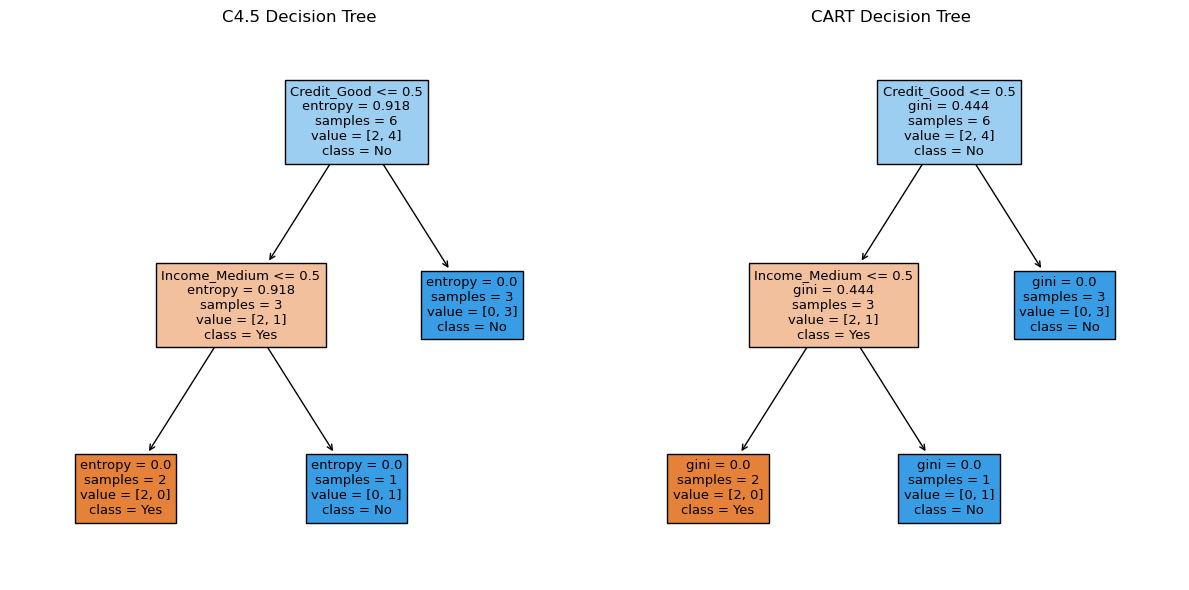

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = df2[['Income', 'Credit']]
y = df2['Loan']
X_encoded = pd.get_dummies(X, drop_first=True).astype(int)

c45_model = DecisionTreeClassifier(criterion='entropy')
c45_model.fit(X_encoded, y)

new_sample = {'Income': 'Medium', 'Credit': 'Good'}
new_sample_encoded = pd.DataFrame({
    'Income_Low': [1 if new_sample['Income'] == 'Low' else 0],
    'Income_Medium': [1 if new_sample['Income'] == 'Medium' else 0],
    'Credit_Good': [1 if new_sample['Credit'] == 'Good' else 0]
})

c45_prediction = c45_model.predict(new_sample_encoded)
print("C4.5 Prediction:", c45_prediction[0])

cart_model = DecisionTreeClassifier(criterion='gini')
cart_model.fit(X_encoded, y)

cart_prediction = cart_model.predict(new_sample_encoded)
print("CART Prediction:", cart_prediction[0])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_tree(c45_model, feature_names=X_encoded.columns, class_names=y.unique(), filled=True)
plt.title("C4.5 Decision Tree")

plt.subplot(1, 2, 2)
plot_tree(cart_model, feature_names=X_encoded.columns, class_names=y.unique(), filled=True)
plt.title("CART Decision Tree")

plt.tight_layout()
plt.show()